In [30]:
import pandas as pd

# Load and display the original normalized features file
original_file = pd.read_csv('extracted_features_all.csv')
print("\nOriginal Normalized Features (first few rows):")
print(original_file.head())


Original Normalized Features (first few rows):
        song_id  num_columns  mfcc_1_min  mfcc_1_max  mfcc_1_mean  \
0   70-MFCC.csv        26979  -609.03960  -73.390305  -264.318414   
1  104-MFCC.csv        34193  -507.75558   -2.346409  -179.180796   
2   67-MFCC.csv         9341  -594.88116 -142.483080  -301.255447   
3  110-MFCC.csv        24413  -604.53700  -47.797054  -216.665971   
4   92-MFCC.csv        22757  -560.72473  -70.374140  -203.180603   

   mfcc_1_median  mfcc_1_std  mfcc_1_variance  mfcc_1_skew  mfcc_1_kurtosis  \
0     -255.84961   80.625633      6500.492697    -1.430020         4.126565   
1     -177.26149   63.096498      3981.168110    -1.961053         9.269314   
2     -295.13766   65.813001      4331.351080    -0.958775         2.539263   
3     -194.19955   91.176897      8313.226535    -1.871377         4.741894   
4     -188.89359   69.878202      4882.963167    -2.759736        10.405252   

   ...  spectral_flatness_mean  spectral_flatness_std  spectra

In [2]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load your original file (replace 'your_file.csv' with the actual file name)
file_path = 'extracted_features_all.csv'  # Update this with your file path
data_df = pd.read_csv(file_path)

# Separate the song_id column if it exists
song_id = data_df['song_id']
feature_data = data_df.drop(columns=['song_id'])

# Set the variance threshold (adjust threshold value as needed)
threshold_value = 0.1
var_thresh = VarianceThreshold(threshold=threshold_value)

# Apply variance thresholding
filtered_features = var_thresh.fit_transform(feature_data)

# Get the selected feature names
selected_feature_names = feature_data.columns[var_thresh.get_support()]

# Create a new DataFrame with the filtered features
filtered_df = pd.DataFrame(filtered_features, columns=selected_feature_names)

# Add back the song_id column if needed
filtered_df.insert(0, 'song_id', song_id)

# Display the resulting DataFrame
print("Filtered DataFrame with variance threshold applied:")
print(filtered_df.head())

# Save the result to a new CSV file if needed
filtered_df.to_csv('filtered_all.csv', index=False)


Filtered DataFrame with variance threshold applied:
        song_id  num_columns  mfcc_1_min  mfcc_1_max  mfcc_1_mean  \
0   70-MFCC.csv      26979.0  -609.03960  -73.390305  -264.318414   
1  104-MFCC.csv      34193.0  -507.75558   -2.346409  -179.180796   
2   67-MFCC.csv       9341.0  -594.88116 -142.483080  -301.255447   
3  110-MFCC.csv      24413.0  -604.53700  -47.797054  -216.665971   
4   92-MFCC.csv      22757.0  -560.72473  -70.374140  -203.180603   

   mfcc_1_median  mfcc_1_std  mfcc_1_variance  mfcc_1_skew  mfcc_1_kurtosis  \
0     -255.84961   80.625633      6500.492697    -1.430020         4.126565   
1     -177.26149   63.096498      3981.168110    -1.961053         9.269314   
2     -295.13766   65.813001      4331.351080    -0.958775         2.539263   
3     -194.19955   91.176897      8313.226535    -1.871377         4.741894   
4     -188.89359   69.878202      4882.963167    -2.759736        10.405252   

   ...  spectral_rolloff_mean  spectral_rolloff_std  spect

In [33]:
import pandas as pd
import numpy as np

# Load the filtered features file
file_path = 'filtered_all.csv'  # Replace with the actual path of your filtered file
filtered_df = pd.read_csv(file_path)

# Select only numeric columns for correlation analysis
numeric_df = filtered_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric features
correlation_matrix = numeric_df.corr().abs()

# Set the threshold for high correlation
threshold = 0.80

# Identify pairs of highly correlated features (threshold > 0.95)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# List of features to drop
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the highly correlated features
reduced_df = filtered_df.drop(columns=highly_correlated_features)

# Save the reduced DataFrame to a new CSV file
reduced_df.to_csv('filtered_all2.csv', index=False)

# Display the first few rows of the reduced DataFrame
print("Reduced DataFrame:")
print(reduced_df.head())

# Print the dropped features
print(f"Dropped features: {highly_correlated_features}")


Reduced DataFrame:
        song_id  num_columns  mfcc_1_min  mfcc_1_max  mfcc_1_mean  mfcc_1_std  \
0   70-MFCC.csv      26979.0  -609.03960  -73.390305  -264.318414   80.625633   
1  104-MFCC.csv      34193.0  -507.75558   -2.346409  -179.180796   63.096498   
2   67-MFCC.csv       9341.0  -594.88116 -142.483080  -301.255447   65.813001   
3  110-MFCC.csv      24413.0  -604.53700  -47.797054  -216.665971   91.176897   
4   92-MFCC.csv      22757.0  -560.72473  -70.374140  -203.180603   69.878202   

   mfcc_1_skew  mfcc_2_min  mfcc_2_max  mfcc_2_std  ...  global_mfcc_skewness  \
0    -1.430020         0.0   223.88953   30.733178  ...             -2.773363   
1    -1.961053         0.0   206.41900   31.398634  ...             -1.373236   
2    -0.958775         0.0   247.00610   34.255390  ...             -1.812997   
3    -1.871377         0.0   257.14000   36.254801  ...             -1.758957   
4    -2.759736         0.0   214.04141   28.291418  ...             -1.509140   

   mid_

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the reduced features file
reduced_file_path = 'filtered_all2.csv'  # Replace with the path to your reduced file
reduced_df = pd.read_csv(reduced_file_path)

# Initialize the scaler
scaler = StandardScaler()

# Select only numeric columns for normalization
numeric_columns = reduced_df.select_dtypes(include=[np.number]).columns

# Apply Z-score normalization to numeric columns
reduced_df[numeric_columns] = scaler.fit_transform(reduced_df[numeric_columns])

# Save the normalized DataFrame to a new CSV file
reduced_df.to_csv('normalized_filtered_all.csv', index=False)

# Display the first few rows of the normalized DataFrame
print("Normalized Reduced DataFrame:")
print(reduced_df.head())


NameError: name 'np' is not defined

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the normalized reduced features file
normalized_reduced_file_path = 'normalized_filtered_all.csv'  # Replace with your actual path
normalized_reduced_df = pd.read_csv(normalized_reduced_file_path)

# Select only numeric columns for VIF calculation
numeric_df = normalized_reduced_df.select_dtypes(include=[float, int])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# Display VIF values
print("VIF values for each feature:")
print(vif_data)

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values for each feature:
                    Feature  VIF
0               num_columns  inf
1                mfcc_1_min  inf
2                mfcc_1_max  inf
3               mfcc_1_mean  inf
4                mfcc_1_std  inf
..                      ...  ...
192       beat_strength_min  inf
193   spectral_rolloff_mean  inf
194    spectral_rolloff_std  inf
195    spectral_rolloff_min  inf
196  spectral_bandwidth_min  inf

[197 rows x 2 columns]


In [38]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Load the standardized data
standardized_file_path = 'normalized_filtered_all.csv'  # Replace with your actual file path
standardized_df = pd.read_csv(standardized_file_path)

# Select only numeric columns for SVD
numeric_df = standardized_df.select_dtypes(include=[np.number])

# Check the number of features
num_features = numeric_df.shape[1]
print(f"Number of features: {num_features}")

# Perform SVD with the desired number of components
n_components = min(150, num_features)  # Use the minimum of 150 or the number of features
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_features = svd.fit_transform(numeric_df)

# Check the shape of reduced_features
print(f"Shape of reduced features: {reduced_features.shape}")

# Convert the reduced features into a DataFrame
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'SVD_{i+1}' for i in range(reduced_features.shape[1])])

# Save the reduced features to a new CSV file
reduced_features_df.to_csv('normalized_filtered_all2.csv', index=False)

# Display the first few rows of the reduced DataFrame (optional)
print(reduced_features_df.head())


Number of features: 197
Shape of reduced features: (116, 116)
       SVD_1     SVD_2     SVD_3     SVD_4     SVD_5     SVD_6     SVD_7  \
0  -5.411210 -0.503476 -1.859148 -0.994620 -1.853217  1.530600  2.616344   
1  -4.863628 -0.193596 -3.045104  2.034780  1.487988 -3.076766 -0.471716   
2  11.972534  0.949673  3.189433 -4.380771 -4.829559 -1.878644  0.524347   
3  -1.568310 -4.664805  3.649952 -7.470024  8.774862  1.445513 -0.886039   
4   3.356655  0.429853 -2.098160  0.412222 -1.569736 -0.894637  0.265695   

      SVD_8     SVD_9    SVD_10  ...   SVD_107   SVD_108   SVD_109   SVD_110  \
0 -1.883947 -0.979717  1.552497  ... -0.202672  0.516280  0.018467  0.098265   
1  1.838459  0.191701 -1.194897  ... -0.356009  0.494130 -0.134710  0.097928   
2  0.080470 -2.803012  0.122771  ... -0.088574  0.011964 -0.402476  0.140782   
3 -0.512473  3.103010  3.234703  ... -0.056845  0.042861 -0.066343 -0.284212   
4 -0.414574 -2.396303  0.346076  ... -0.111754  0.050189  0.029843 -0.217695   



In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the normalized reduced features file
normalized_reduced_file_path = 'normalized_filtered_all2.csv'  # Replace with your actual path
normalized_reduced_df = pd.read_csv(normalized_reduced_file_path)

# Select only numeric columns for VIF calculation
numeric_df = normalized_reduced_df.select_dtypes(include=[float, int])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# Display VIF values
print("VIF values for each feature:")
print(vif_data)

VIF values for each feature:
     Feature       VIF
0      SVD_1  1.000000
1      SVD_2  1.000000
2      SVD_3  1.000000
3      SVD_4  1.000000
4      SVD_5  1.000000
..       ...       ...
111  SVD_112  1.000000
112  SVD_113  1.000000
113  SVD_114  1.000000
114  SVD_115  1.000000
115  SVD_116  1.033042

[116 rows x 2 columns]


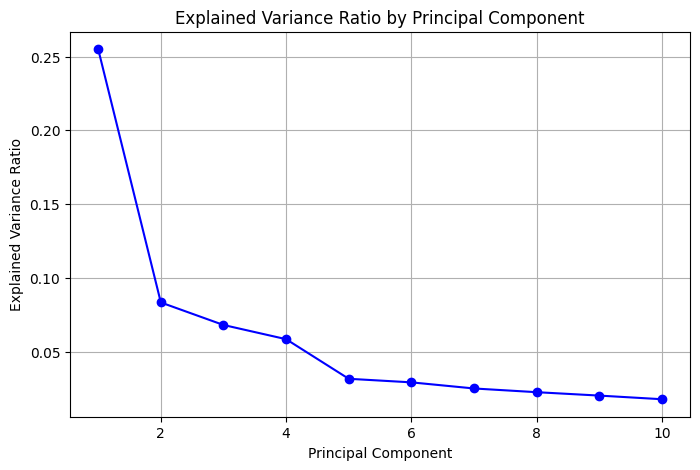

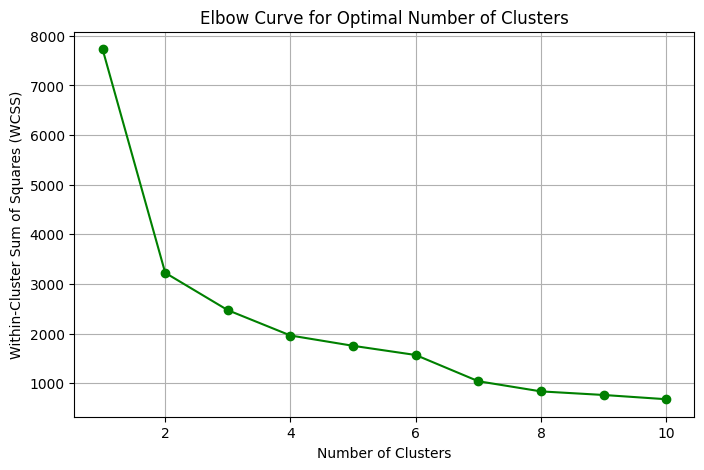

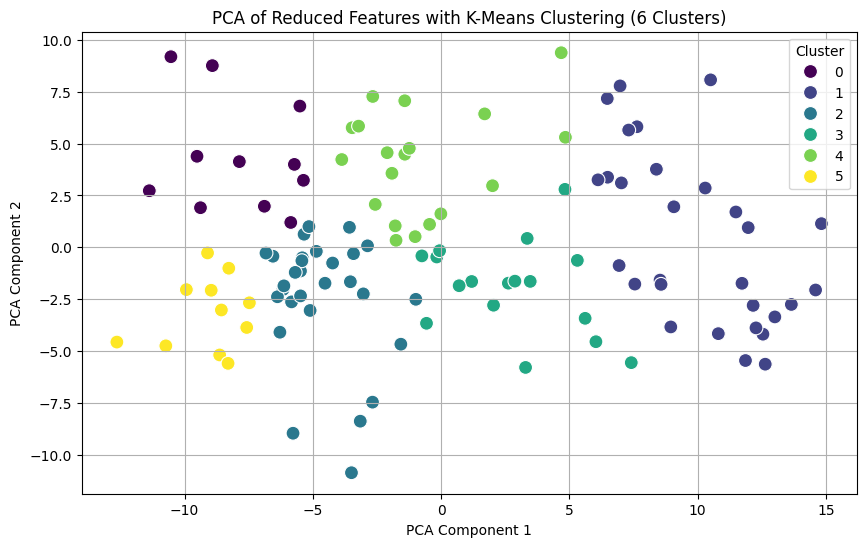

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced features from the SVD output
reduced_file_path = 'normalized_filtered_all2.csv'  # Path to your SVD output file
reduced_features_df = pd.read_csv(reduced_file_path)

# Perform PCA on the reduced features
max_components = min(10, reduced_features_df.shape[1])  # Set a maximum number of components for visualization
pca = PCA(n_components=max_components)
pca.fit(reduced_features_df)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each component (Elbow for PCA)
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Reduce to the desired number of components for visualization (e.g., 2 components for PCA scatter plot)
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
pca_features = pca.fit_transform(reduced_features_df)

# Convert PCA features into a DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(n_components_pca)])

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10  # Set the maximum number of clusters for the elbow curve
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve for clustering
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', color='g')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Apply K-Means clustering with the chosen number of clusters (e.g., 6 clusters)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_features_df['Cluster'] = kmeans.fit_predict(pca_features_df)

# Visualize the PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_features_df, x='PCA_1', y='PCA_2', hue='Cluster', palette='viridis', s=100)
plt.title(f'PCA of Reduced Features with K-Means Clustering ({n_clusters} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optionally, save the PCA features with clusters to a new file
pca_features_df.to_csv('pca_filtered_all.csv', index=False)


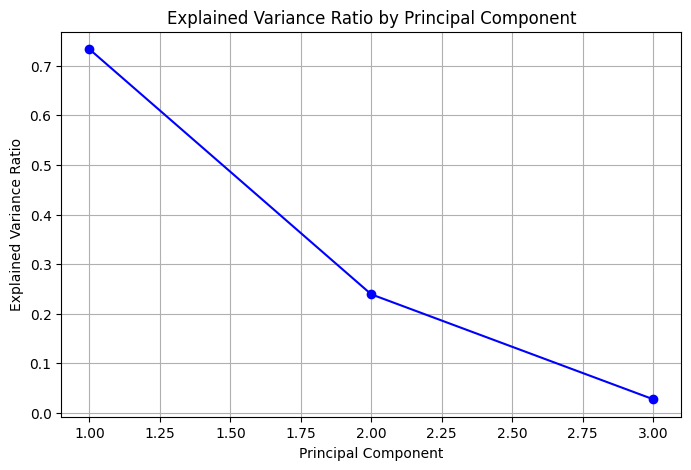

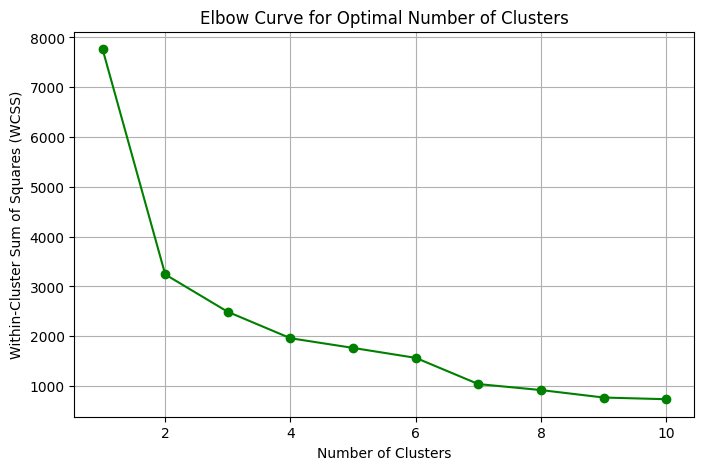

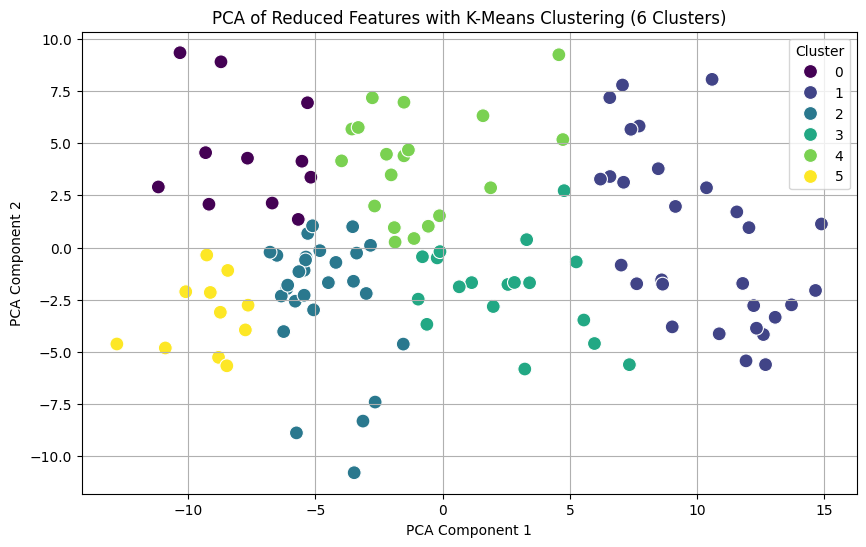

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced features from the SVD output
reduced_file_path = 'pca_filtered_all.csv'  # Path to your SVD output file
reduced_features_df = pd.read_csv(reduced_file_path)

# Perform PCA on the reduced features
max_components = min(10, reduced_features_df.shape[1])  # Set a maximum number of components for visualization
pca = PCA(n_components=max_components)
pca.fit(reduced_features_df)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each component (Elbow for PCA)
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Reduce to the desired number of components for visualization (e.g., 2 components for PCA scatter plot)
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
pca_features = pca.fit_transform(reduced_features_df)

# Convert PCA features into a DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(n_components_pca)])

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10  # Set the maximum number of clusters for the elbow curve
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve for clustering
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', color='g')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Apply K-Means clustering with the chosen number of clusters (e.g., 6 clusters)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_features_df['Cluster'] = kmeans.fit_predict(pca_features_df)

# Visualize the PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_features_df, x='PCA_1', y='PCA_2', hue='Cluster', palette='viridis', s=100)
plt.title(f'PCA of Reduced Features with K-Means Clustering ({n_clusters} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optionally, save the PCA features with clusters to a new file
pca_features_df.to_csv('pca_filtered_all2.csv', index=False)


Silhouette Score for existing 6 K-Means clusters: 0.43565982580184937
Davies-Bouldin Index for existing 6 K-Means clusters: 0.7336657962084835

Cluster Counts:
Cluster 0: 24 points
Cluster 1: 36 points
Cluster 2: 11 points
Cluster 3: 16 points
Cluster 4: 19 points
Cluster 5: 10 points


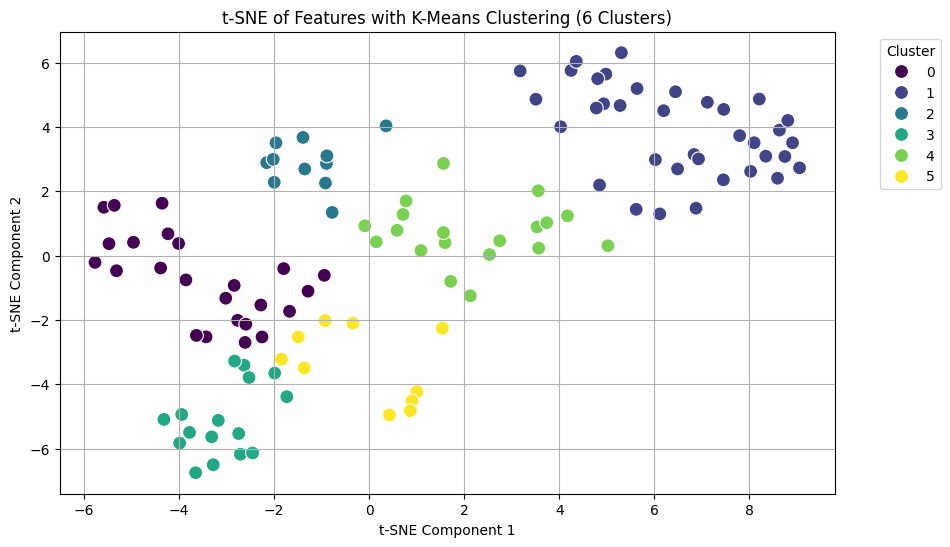

In [6]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced features from the SVD output
file_path = 'pca_filtered_all2.csv'  # Path to your file with features
features_df = pd.read_csv(file_path)

# Perform t-SNE on the features
n_components_tsne = 2  # Set to 2 for visualization purposes
tsne = TSNE(n_components=n_components_tsne, random_state=42)
tsne_features = tsne.fit_transform(features_df)

# Convert t-SNE features into a DataFrame
tsne_features_df = pd.DataFrame(tsne_features, columns=[f'tSNE_{i+1}' for i in range(n_components_tsne)])

# Apply K-Means clustering with 6 clusters (assuming it is already optimal)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
tsne_features_df['Cluster'] = kmeans.fit_predict(tsne_features_df)

# Calculate silhouette score and Davies-Bouldin index for the 6 clusters
silhouette_kmeans = silhouette_score(tsne_features_df[[f'tSNE_{i+1}' for i in range(n_components_tsne)]], tsne_features_df['Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(tsne_features_df[[f'tSNE_{i+1}' for i in range(n_components_tsne)]], tsne_features_df['Cluster'])

print(f'Silhouette Score for existing 6 K-Means clusters: {silhouette_kmeans}')
print(f'Davies-Bouldin Index for existing 6 K-Means clusters: {davies_bouldin_kmeans}')

# Print cluster counts (number of points in each cluster)
cluster_counts = tsne_features_df['Cluster'].value_counts().sort_index()
print("\nCluster Counts:")
for cluster_num, count in cluster_counts.items():
    print(f"Cluster {cluster_num}: {count} points")

# Visualize the t-SNE plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_features_df, x='tSNE_1', y='tSNE_2', hue='Cluster', palette='viridis', s=100)
plt.title(f't-SNE of Features with K-Means Clustering ({n_clusters} Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Optionally, save the t-SNE features with clusters to a new file
tsne_features_df.to_csv('tsne_clustered_features.csv', index=False)
